In [99]:
# Read the data with Pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from IPython.display import Image 
from pydot import graph_from_dot_data
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix


infile = open("/content/data.csv",'r')

from IPython.display import display
classes = pd.read_csv(infile,names = ('Mean of the integrated profile', ' Standard deviation of the integrated profile', ' Excess kurtosis of the integrated profile', ' Skewness of the integrated profile', ' Mean of the DM-SNR curve', ' Standard deviation of the DM-SNR curve', ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve', 'target_class'))
classes = pd.DataFrame(classes[1:]).astype(float)

# Features and targets
X = classes.loc[:, classes.columns != 'target_class'].values
y = classes.loc[:, classes.columns == 'target_class']
train_size=0.8
test_size=1-train_size
#splitting of the data set
X_tr, X_tst, Y_tr, Y_tst = train_test_split(X, y, train_size=train_size, test_size=test_size)
#processing for the class_weight module
Y=np.unique(Y_tr)
Y_tr=Y_tr.values.reshape(-1)
print(Y_tr,Y)
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=Y , y=Y_tr)
class_weights = dict(enumerate(class_weights))
print(class_weights)
   

print(len(X_tst))




[0. 0. 1. ... 0. 0. 0.] [0. 1.]
{0: 0.5522641363881817, 1: 5.283394833948339}
3580


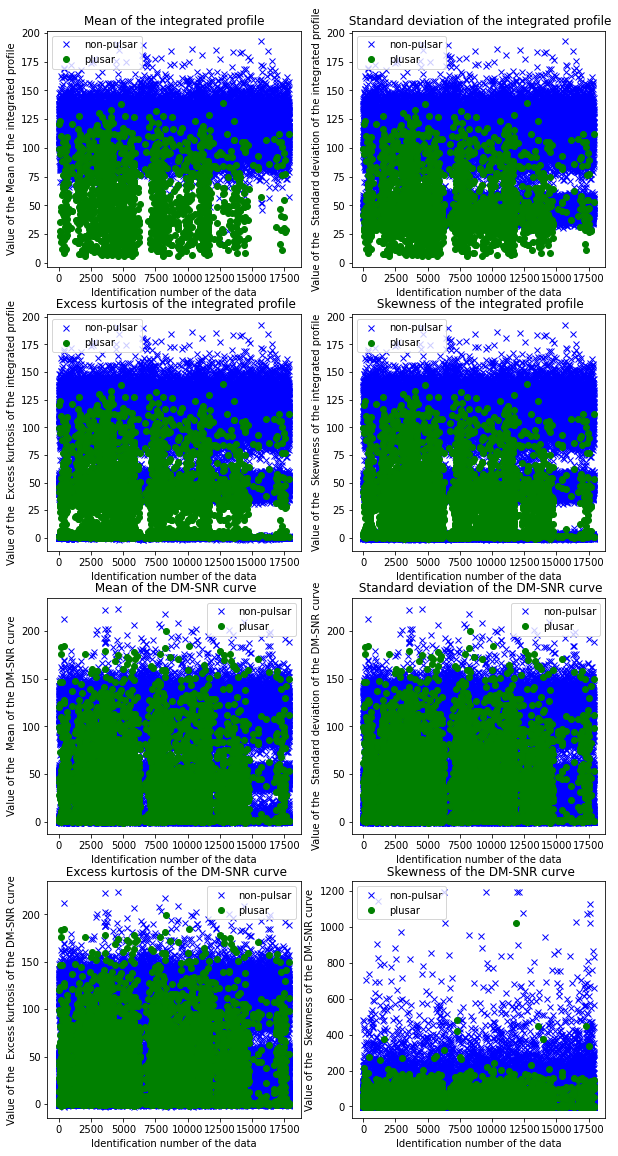

In [100]:
import matplotlib.pyplot as pyplot
toplot=[]
toplot2=[]
vector1=[]
vector2=[]
features=['Mean of the integrated profile', ' Standard deviation of the integrated profile', ' Excess kurtosis of the integrated profile', ' Skewness of the integrated profile', ' Mean of the DM-SNR curve', ' Standard deviation of the DM-SNR curve', ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve']
ploting=np.asarray(y)
plt.figure(0, figsize=(10,20))
for j in range(8):
  for i in range(len(X)):
    if ploting[i]==0:
      toplot.append(X[i][j])
      vector1.append(i)
    else :
      toplot2.append(X[i][j]) 
      vector2.append(i)


  plt.subplot(4,2,j+1)
  plt.title(features[j])

  plt.plot(vector1,toplot,'b',marker='x', linestyle="None", label="non-pulsar")
  plt.plot(vector2,toplot2,'g', marker='o',linestyle="None",label="plusar")
  plt.legend()
  plt.xlabel("Identification number of the data")
  plt.ylabel('Value of the ' + features[j])
plt.savefig("/content/data.png")
  
    


Train set accuracy with Decision Tree: 0.97
Test set accuracy with Decision Tree: 0.97
[0. 1. 0. ... 0. 0. 0.]
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      3296
         1.0       0.82      0.87      0.84       284

    accuracy                           0.97      3580
   macro avg       0.91      0.93      0.92      3580
weighted avg       0.98      0.97      0.97      3580



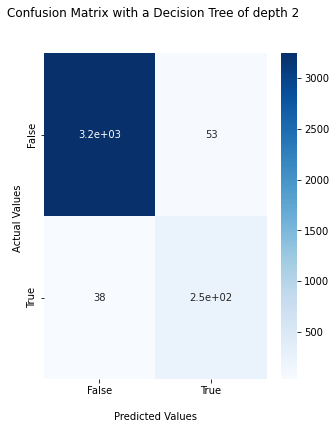

In [101]:
#Classification tree
np.random.seed(0)
tree_clf = DecisionTreeClassifier(criterion="entropy",max_depth=2, class_weight=class_weights)
tree_clf.fit(X_tr, Y_tr)
print("Train set accuracy with Decision Tree: {:.2f}".format(tree_clf.score(X_tr,Y_tr)))
print("Test set accuracy with Decision Tree: {:.2f}".format(tree_clf.score(X_tst,Y_tst)))


predicte=tree_clf.predict(X_tst)
print(predicte)
#Checking the results of the training
report = classification_report(Y_tst, predicte)
print(report)

#Calcul of the confusion matrix (CM)
cm = confusion_matrix(Y_tst,predicte)
#plot of the CM
plt.figure(1,figsize=(5,6))
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with a Decision Tree of depth 2 \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

#Labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.savefig("/content/cmtree.png")
#Visualization of the Confusion Matrix.
plt.show()



 Feature Names: 

 [0 1 2 3 4 5 6 7] 


Feature Correlation:



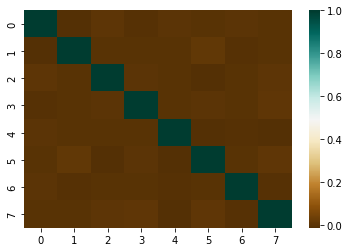

In [103]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import seaborn as sns
from IPython.display import Image 
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

X3=X
y3=y

variance_pct = 8 # Minimum percentage of variance we want to be described by the resulting transformed components
pca = PCA(n_components=variance_pct) # Create PCA object
X_transformed = pca.fit_transform(X3,y3) # Transform the initial features
X3pca = pd.DataFrame(X_transformed) # Create a data frame from PCA
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3pca, y3, test_size=0.2)
print('\n Feature Names: \n\n', X3pca.columns.values, "\n")
print("\nFeature Correlation:\n")
g = sns.heatmap(X_train3.corr(),cmap="BrBG",annot=False)

Train set accuracy with Decision Tree: 1.00
Test set accuracy with Decision Tree: 0.96
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      3296
         1.0       0.76      0.79      0.77       284

    accuracy                           0.96      3580
   macro avg       0.87      0.88      0.88      3580
weighted avg       0.96      0.96      0.96      3580



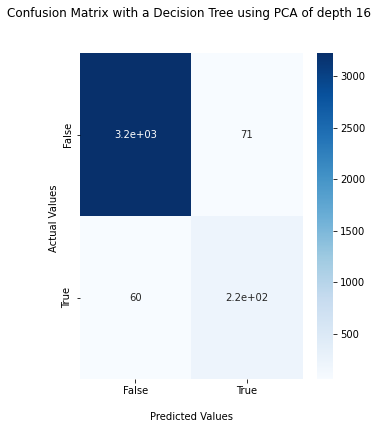

In [104]:
# Classification tree
np.random.seed(0)
tree_clf = DecisionTreeClassifier(criterion="gini",max_depth=16, class_weight=class_weights)
tree_clf.fit(X_train3, Y_train3)
print("Train set accuracy with Decision Tree: {:.2f}".format(tree_clf.score(X_train3,Y_train3)))
print("Test set accuracy with Decision Tree: {:.2f}".format(tree_clf.score(X_test3,Y_test3)))

predicte=tree_clf.predict(X_test3)


report = classification_report(Y_test3, predicte)
#Checking the results
print(report)
#Calcul of the confusion matrix
cm = confusion_matrix(Y_test3,predicte)
#Ploting the confusion matrix
plt.figure(1,figsize=(5,6))
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with a Decision Tree using PCA of depth 16 \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

#Labels 
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.savefig("/content/cmtree112.png")
#Visualization of the Confusion Matrix.
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


Train set accuracy with Decision Tree: 1.00
Test set accuracy with Decision Tree: 0.98
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      3296
         1.0       0.93      0.82      0.87       284

    accuracy                           0.98      3580
   macro avg       0.96      0.91      0.93      3580
weighted avg       0.98      0.98      0.98      3580



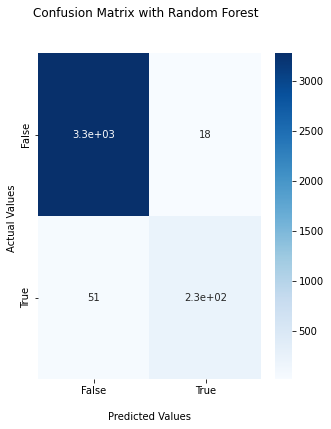

In [105]:
from sklearn.ensemble import RandomForestClassifier
# Classification tree
np.random.seed(0)
tree_clf = RandomForestClassifier(25,criterion="gini", class_weight="balanced_subsample",oob_score= True)
tree_clf.fit(X_train3, Y_train3)
print("Train set accuracy with Decision Tree: {:.2f}".format(tree_clf.score(X_train3,Y_train3)))
print("Test set accuracy with Decision Tree: {:.2f}".format(tree_clf.score(X_test3,Y_test3)))

predicte=tree_clf.predict(X_test3)

report = classification_report(Y_test3, predicte)
print(report)


#Calcul of the confusion matrix

cm = confusion_matrix(Y_test3,predicte)
#Ploting the confusion matrix
plt.figure(1,figsize=(5,6))
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with Random Forest  \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.savefig("/content/RF.png")
#Visualization of the Confusion Matrix.
plt.show()


In [62]:
tree_clf.oob_score_

0.9792568794524374